In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
import pyodbc
from datetime import datetime

In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


# Prodotti

In [3]:
#elenco dei prodotti
prodotti=pd.read_excel('Prodotti.xlsx')
prodotti['Categoria']=['Elettronica','Informatica','Informatica','Audiovideo']
prodotti= prodotti.rename(columns={'CodiceProdotto': 'CodiceProd'})
prodotti

,CodiceProd,Costo,PrezzoUnitario,Categoria
0,A80DG,235,290,Elettronica
1,AB73FT,114,167,Informatica
2,K72FF,95,122,Informatica
3,LW46HT,158,199,Audiovideo


In [4]:
prodotti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CodiceProd      4 non-null      object
 1   Costo           4 non-null      int64 
 2   PrezzoUnitario  4 non-null      int64 
 3   Categoria       4 non-null      object
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes


# Vendite Lombardia

In [5]:
import pyodbc
import pandas as pd

# Configura la stringa di connessione al tuo database Access
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=C:\Users\aless\OneDrive\Desktop\PDF Neural Academy\pdf_pratica\lezione_13\Vendite_Lombardia.accdb;'
)

# Crea una connessione al database Access
conn = pyodbc.connect(conn_str)

# Sostituisci 'table_name' con il nome della tabella che desideri convertire in CSV
query = "SELECT * FROM Vendite_Lombardia"

# Esegui la query SQL e leggi i dati in un DataFrame di Pandas
vendite_Lomb = pd.read_sql(query, conn)

# Chiudi la connessione al database Access
conn.close()

# Salva il DataFrame in un file CSV
vendite_Lomb.to_excel('Vendite_Lombardia.xlsx', index=False)  # 'output.csv' è il nome del file CSV di output


C:\Users\aless\AppData\Local\Temp\ipykernel_19044\2917420562.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vendite_Lomb = pd.read_sql(query, conn)


In [6]:
vendite_Lomb

,ID,DataVendita,CodiceProd,Quantità
0,1,2015-01-05,K72FF,50.0
1,2,2015-01-03,K72FF,85.0
2,3,2014-12-28,LW46HT,40.0
3,4,2015-01-02,LW46HT,75.0
4,5,2015-01-05,LW46HT,90.0
...,...,...,...,...
2564,2565,2015-01-03,AB73FT,80.0
2565,2566,2015-01-01,K72FF,90.0
2566,2567,2014-12-30,LW46HT,85.0
2567,2568,2014-12-28,LW46HT,100.0


In [7]:
vendite_Lomb=vendite_Lomb.drop(columns='ID')
vendite_Lomb['DataVendita'] = pd.to_datetime(vendite_Lomb['DataVendita'])
vendite_Lomb= vendite_Lomb.rename(columns={'DataVendita': 'Data'})
vendite_Lomb.insert(0,'Regione',['Lombardia' for x in range(len(vendite_Lomb))])
vendite_Lomb.Quantità = vendite_Lomb.Quantità.astype('int64')

In [8]:
vendite_Lomb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Regione     2569 non-null   object        
 1   Data        2569 non-null   datetime64[ns]
 2   CodiceProd  2569 non-null   object        
 3   Quantità    2569 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 80.4+ KB


In [9]:
vendite_Lomb.groupby(by='CodiceProd').Quantità.sum()

CodiceProd
A80DG     36790
AB73FT    35610
K72FF     34290
LW46HT    36545
Name: Quantità, dtype: int64

# Vendite Veneto

In [10]:
#vendite Veneto
vendite_Veneto=pd.read_excel('Vendite_Veneto.xlsx')

In [11]:
vendite_Veneto.insert(0,'Regione',['Veneto' for x in range(len(vendite_Veneto))])
vendite_Veneto.tail()

,Regione,Data,CodiceProd,Quantità
2566,Veneto,2015-01-06,LW46HT,51
2567,Veneto,2015-01-06,LW46HT,60
2568,Veneto,2015-01-06,LW46HT,15
2569,Veneto,2023-11-04,PROVA,15
2570,Veneto,2023-11-04,PROVA,15


In [12]:
vendite_Veneto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Regione     2571 non-null   object        
 1   Data        2571 non-null   datetime64[ns]
 2   CodiceProd  2571 non-null   object        
 3   Quantità    2571 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 80.5+ KB


In [13]:
vendite_Veneto=vendite_Veneto.drop([2569,2570])
vendite_Veneto.tail(10)

,Regione,Data,CodiceProd,Quantità
2559,Veneto,2015-01-06,LW46HT,21
2560,Veneto,2015-01-06,LW46HT,54
2561,Veneto,2015-01-06,LW46HT,12
2562,Veneto,2015-01-06,LW46HT,30
2563,Veneto,2015-01-06,LW46HT,15
2564,Veneto,2015-01-06,LW46HT,48
2565,Veneto,2015-01-06,LW46HT,54
2566,Veneto,2015-01-06,LW46HT,51
2567,Veneto,2015-01-06,LW46HT,60
2568,Veneto,2015-01-06,LW46HT,15


In [14]:
vendite_Veneto.groupby(by='CodiceProd').Quantità.sum()

CodiceProd
A80DG     21822
AB73FT    20889
K72FF     21525
LW46HT    21705
Name: Quantità, dtype: int64

# Vendite Liguria

In [15]:
#vendite Liguria
vendite_Liguria=pd.read_csv('Vendite_Liguria.txt',delimiter="\t",encoding="ISO-8859-1")

In [16]:
vendite_Liguria
vendite_Liguria['DataVendita'] = pd.to_datetime(vendite_Liguria['DataVendita'],format="%d/%m/%Y")
vendite_Liguria= vendite_Liguria.rename(columns={'DataVendita': 'Data'})
vendite_Liguria= vendite_Liguria.rename(columns={'CodiceProdotto': 'CodiceProd'})
vendite_Liguria.insert(0,'Regione',['Liguria' for x in range(len(vendite_Liguria))])

In [17]:
vendite_Liguria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Regione     153 non-null    object        
 1   Data        153 non-null    datetime64[ns]
 2   CodiceProd  153 non-null    object        
 3   Quantità    153 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.9+ KB


In [18]:
vendite_Liguria.groupby(by='CodiceProd').Quantità.sum()


CodiceProd
A80DG     2560
AB73FT    1970
K72FF     2360
LW46HT    1990
Name: Quantità, dtype: int64

# Prodotti totali venduti

In [19]:
#creo il file da usare in excel
vendite_totali= vendite_Liguria.copy()

In [20]:
vendite_totali=vendite_totali.merge(vendite_Lomb,how='outer')

In [21]:
vendite_totali=vendite_totali.merge(vendite_Veneto,how='outer')

In [22]:
vendite_totali=vendite_totali.merge(prodotti,on='CodiceProd',how='left')

In [23]:
vendite_totali

,Regione,Data,CodiceProd,Quantità,Costo,PrezzoUnitario,Categoria
0,Liguria,2014-12-10,LW46HT,10,158,199,Audiovideo
1,Liguria,2014-12-10,A80DG,15,235,290,Elettronica
2,Liguria,2014-12-11,LW46HT,15,158,199,Audiovideo
3,Liguria,2014-12-11,A80DG,20,235,290,Elettronica
4,Liguria,2014-12-12,LW46HT,20,158,199,Audiovideo
...,...,...,...,...,...,...,...
5286,Veneto,2015-01-06,LW46HT,42,158,199,Audiovideo
5287,Veneto,2015-01-06,LW46HT,27,158,199,Audiovideo
5288,Veneto,2015-01-06,LW46HT,18,158,199,Audiovideo
5289,Veneto,2015-01-06,LW46HT,48,158,199,Audiovideo


In [24]:
#file che userò su excel
vendite_totali.to_excel( r'C:\Users\aless\OneDrive\Desktop\PDF Neural Academy\pdf_pratica\lezione_13\Vendite_totali.xlsx',index= False)

In [25]:
tabella1=pd.pivot_table(vendite_totali,values='Quantità', index=['CodiceProd'], columns=['Regione'], aggfunc="sum")
tabella1['Totale']=tabella1['Liguria']+tabella1['Lombardia']+tabella1['Veneto']

tabella1

Regione,Liguria,Lombardia,Veneto,Totale
CodiceProd,,,,
A80DG,2560,36790,21822,61172
AB73FT,1970,35610,20889,58469
K72FF,2360,34290,21525,58175
LW46HT,1990,36545,21705,60240


In [26]:
vendite_totali['Costo']=vendite_totali['Costo']*vendite_totali['Quantità']
vendite_totali['PrezzoUnitario']=vendite_totali['PrezzoUnitario']*vendite_totali['Quantità']
vendite_totali = vendite_totali.rename(columns={'PrezzoUnitario': 'Vendita'})
vendite_totali['Margine']=(vendite_totali['Vendita']-vendite_totali['Costo'])

In [27]:
vendite_totali

,Regione,Data,CodiceProd,Quantità,Costo,Vendita,Categoria,Margine
0,Liguria,2014-12-10,LW46HT,10,1580,1990,Audiovideo,410
1,Liguria,2014-12-10,A80DG,15,3525,4350,Elettronica,825
2,Liguria,2014-12-11,LW46HT,15,2370,2985,Audiovideo,615
3,Liguria,2014-12-11,A80DG,20,4700,5800,Elettronica,1100
4,Liguria,2014-12-12,LW46HT,20,3160,3980,Audiovideo,820
...,...,...,...,...,...,...,...,...
5286,Veneto,2015-01-06,LW46HT,42,6636,8358,Audiovideo,1722
5287,Veneto,2015-01-06,LW46HT,27,4266,5373,Audiovideo,1107
5288,Veneto,2015-01-06,LW46HT,18,2844,3582,Audiovideo,738
5289,Veneto,2015-01-06,LW46HT,48,7584,9552,Audiovideo,1968


In [28]:
tabella2=pd.pivot_table(vendite_totali,values=['Quantità','Costo','Vendita','Margine'],index=['CodiceProd','Regione'], aggfunc="sum")
tabella2 = tabella2[['Quantità', 'Costo', 'Vendita', 'Margine']]
tabella2

Quantità    Costo   Vendita  Margine
CodiceProd Regione                                        
A80DG      Liguria        2560   601600    742400   140800
           Lombardia     36790  8645650  10669100  2023450
           Veneto        21822  5128170   6328380  1200210
AB73FT     Liguria        1970   224580    328990   104410
           Lombardia     35610  4059540   5946870  1887330
           Veneto        20889  2381346   3488463  1107117
K72FF      Liguria        2360   224200    287920    63720
           Lombardia     34290  3257550   4183380   925830
           Veneto        21525  2044875   2626050   581175
LW46HT     Liguria        1990   314420    396010    81590
           Lombardia     36545  5774110   7272455  1498345
           Veneto        21705  3429390   4319295   889905

# Vendite mensili e settimanali

In [29]:
vendite_totali['Anno']=vendite_totali['Data'].dt.year

In [30]:
vendite_totali['Mese']=vendite_totali['Data'].dt.month

In [31]:
import calendar
lista=[]
for x in range(len(vendite_totali)):
    lista.append(calendar.day_name[vendite_totali['Data'][x].weekday()])
vendite_totali['Giorno']=lista

In [32]:
vendite_totali

,Regione,Data,CodiceProd,Quantità,Costo,Vendita,Categoria,Margine,Anno,Mese,Giorno
0,Liguria,2014-12-10,LW46HT,10,1580,1990,Audiovideo,410,2014,12,Wednesday
1,Liguria,2014-12-10,A80DG,15,3525,4350,Elettronica,825,2014,12,Wednesday
2,Liguria,2014-12-11,LW46HT,15,2370,2985,Audiovideo,615,2014,12,Thursday
3,Liguria,2014-12-11,A80DG,20,4700,5800,Elettronica,1100,2014,12,Thursday
4,Liguria,2014-12-12,LW46HT,20,3160,3980,Audiovideo,820,2014,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...
5286,Veneto,2015-01-06,LW46HT,42,6636,8358,Audiovideo,1722,2015,1,Tuesday
5287,Veneto,2015-01-06,LW46HT,27,4266,5373,Audiovideo,1107,2015,1,Tuesday
5288,Veneto,2015-01-06,LW46HT,18,2844,3582,Audiovideo,738,2015,1,Tuesday
5289,Veneto,2015-01-06,LW46HT,48,7584,9552,Audiovideo,1968,2015,1,Tuesday


In [33]:
vendite_mensili=pd.pivot_table(vendite_totali,values='Quantità', index=['CodiceProd', 'Regione'], columns=['Anno','Mese'], aggfunc="sum")
vendite_mensili

Anno                     2014     2015                     
Mese                       12       1      2      3      4 
CodiceProd Regione                                         
A80DG      Liguria      345.0    780.0  480.0  755.0  200.0
           Lombardia  16180.0  20610.0    NaN    NaN    NaN
           Veneto      9714.0  12108.0    NaN    NaN    NaN
AB73FT     Liguria      215.0    345.0  475.0  675.0  260.0
           Lombardia  16625.0  18985.0    NaN    NaN    NaN
           Veneto      9639.0  11250.0    NaN    NaN    NaN
K72FF      Liguria      500.0    380.0  630.0  680.0  170.0
           Lombardia  15900.0  18390.0    NaN    NaN    NaN
           Veneto     10032.0  11493.0    NaN    NaN    NaN
LW46HT     Liguria      385.0    535.0  585.0  175.0  310.0
           Lombardia  17545.0  19000.0    NaN    NaN    NaN
           Veneto     10449.0  11256.0    NaN    NaN    NaN

In [34]:
#vendite Veneto Dicembre
vendite_totali[(vendite_totali['Regione']=='Veneto')&(vendite_totali['Mese']==12)].groupby(by='Giorno').Quantità.sum().sort_values()

Giorno
Monday       7479
Sunday       7638
Saturday     8106
Wednesday    8196
Tuesday      8415
Name: Quantità, dtype: int64

Text(0.5, 1.0, 'Vendite Veneto Dicembre')

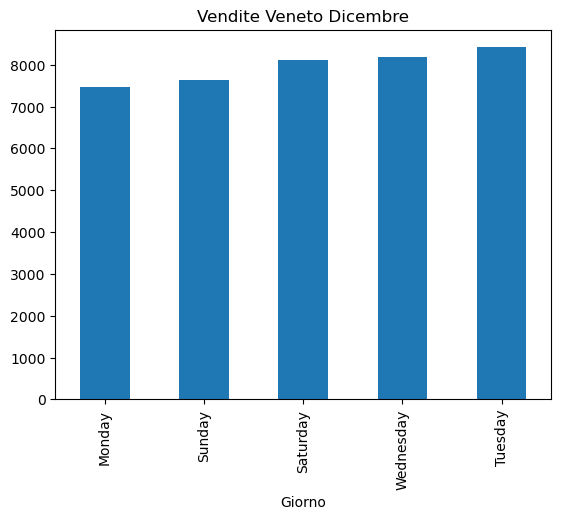

In [35]:
vendite_totali[(vendite_totali['Regione']=='Veneto')&(vendite_totali['Mese']==12)].groupby(by='Giorno').Quantità.sum().sort_values().plot(kind='bar')
plt.title('Vendite Veneto Dicembre')

In [36]:
#Vendite Lombardia Dicembre
vendite_totali[(vendite_totali['Regione']=='Lombardia')&(vendite_totali['Mese']==12)].groupby(by='Giorno').Quantità.sum().sort_values()

Giorno
Monday       12535
Sunday       12560
Saturday     13475
Wednesday    13540
Tuesday      14140
Name: Quantità, dtype: int64

Text(0.5, 1.0, 'Vendite Lombardia Dicembre')

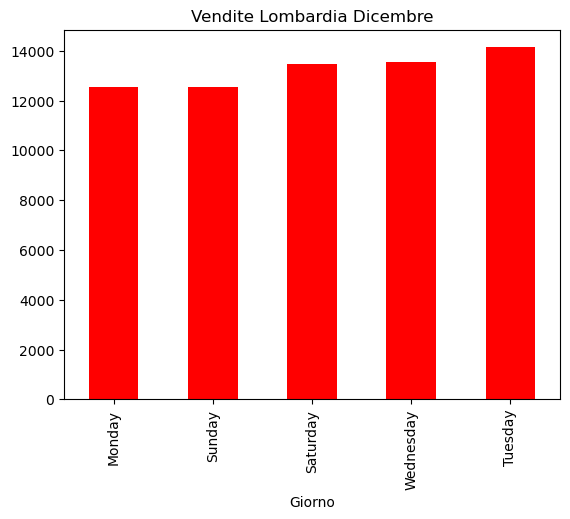

In [37]:
vendite_totali[(vendite_totali['Regione']=='Lombardia')&(vendite_totali['Mese']==12)].groupby(by='Giorno').Quantità.sum().sort_values().plot(kind='bar',color='r')
plt.title('Vendite Lombardia Dicembre')

In [38]:
#Vendite Liguria Dicembre
vendite_totali[(vendite_totali['Regione']=='Liguria')&(vendite_totali['Mese']==12)].groupby(by='Giorno').Quantità.sum().sort_values()

Giorno
Tuesday      135
Friday       195
Thursday     250
Wednesday    275
Saturday     285
Sunday       305
Name: Quantità, dtype: int64

Text(0.5, 1.0, 'Vendite Liguria Dicembre')

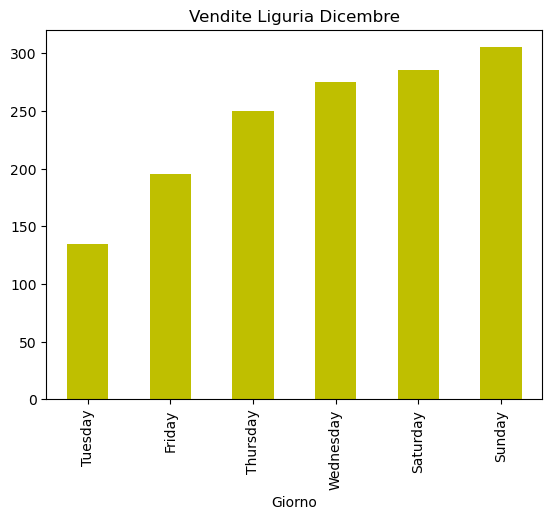

In [39]:
vendite_totali[(vendite_totali['Regione']=='Liguria')&(vendite_totali['Mese']==12)].groupby(by='Giorno').Quantità.sum().sort_values().plot(kind='bar',color='y')
plt.title('Vendite Liguria Dicembre')

In [40]:
#Vendite Liguria Gennaio
vendite_totali[(vendite_totali['Regione']=='Liguria')&(vendite_totali['Mese']==1)].groupby(by='Giorno').Quantità.sum().sort_values()

Giorno
Saturday      80
Sunday        85
Wednesday    260
Monday       365
Friday       380
Tuesday      425
Thursday     445
Name: Quantità, dtype: int64

In [41]:
#Vendite Liguria Febbraio
vendite_totali[(vendite_totali['Regione']=='Liguria')&(vendite_totali['Mese']==2)].groupby(by='Giorno').Quantità.sum().sort_values()

Giorno
Wednesday    215
Friday       260
Sunday       330
Monday       360
Saturday     485
Tuesday      520
Name: Quantità, dtype: int64

In [42]:
#Vendite Liguria Marzo
vendite_totali[(vendite_totali['Regione']=='Liguria')&(vendite_totali['Mese']==3)].groupby(by='Giorno').Quantità.sum().sort_values()

Giorno
Tuesday       75
Monday       255
Friday       270
Saturday     335
Wednesday    350
Sunday       480
Thursday     520
Name: Quantità, dtype: int64

# STREAMLIT

In [44]:
import streamlit as st
st.title('hello')

2023-11-11 16:46:21.062 
  command:

    streamlit run C:\Users\aless\OneDrive\Documenti\ANACONDA\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [47]:
C:\Users\aless\OneDrive\Documenti\ANACONDA\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]

SyntaxError: unexpected character after line continuation character (3754188848.py, line 1)